<a href="https://colab.research.google.com/github/Danalmestadi/T5-WeekFive/blob/main/ARIMA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parameter Analysis for the ARIMA model**

## Import the library


In [13]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima
import pandas as pd


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read dataset

In [15]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/traffic_exer.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [16]:
df=df.iloc[:300]
df.shape

(300, 4)

## Fit auto_arima function to AirPassengers dataset


In [17]:
stepwise_fit = auto_arima(df['Vehicles'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2216.673, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1654.961, Time=0.95 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.27 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2214.930, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1808.491, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1655.675, Time=3.54 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=11.24 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=5.64 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=18.39 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1965.965, Time=1.18 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1635.008, Time=0.76 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=1810.107, Time=0.30 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1636.402, Time=4.65 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

## To print the summary


In [18]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -812.604
Date:                            Thu, 22 Aug 2024   AIC                           1633.208
Time:                                    07:45:40   BIC                           1647.860
Sample:                                         0   HQIC                          1639.080
                                            - 300                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5749      0.047     12.351      0.000       0.484       0.666
ar.L2          0.2930      0.049      5.963      0.000       0.197       0.389
ar.S.L12      -0.7293      0.030    -24.516      0.000      -0.788      -0.671
sigma2        15.9668      0.861     18.554      0.000      14.280      17.653
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               138.94
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [19]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing


## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Vehicles'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                  288
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -749.310
Date:                            Thu, 22 Aug 2024   AIC                           1508.620
Time:                                    07:45:44   BIC                           1526.703
Sample:                                         0   HQIC                          1515.877
                                            - 288                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3299      0.051     -6.458      0.000      -0.430      -0.230
ar.S.L12      -0.2015      0.070     -2.881      0.004      -0.339      -0.064
ar.S.L24       0.2776      0.075      3.711      0.000       0.131       0.424
ma.S.L12      -0.9999     71.398     -0.014      0.989    -140.937     138.937
sigma2        11.7930    841.672      0.014      0.989   -1637.855    1661.441
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               237.94
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.49   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [21]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Vehicles")


## plot predictions and actual values



<Axes: >

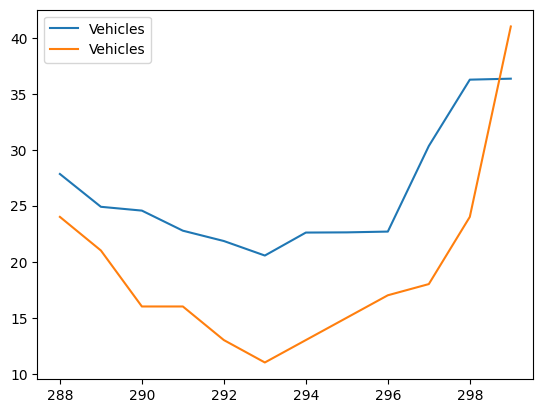

In [22]:
predictions.plot(legend = True)
test['Vehicles'].plot(legend = True)

## Evaluate the model using MSE and RMSE

In [23]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Vehicles"], predictions)

# Calculate mean squared error
mean_squared_error(test["Vehicles"], predictions)

68.72239887218889

#**Well Done :)**